In [ ]:
import pandas as pd
import numpy as np
from os import chdir, listdir, curdir
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
data = pd.read_csv('../data/conversion_data_train.csv')
print(data.head(10))
print(data.shape)
print(data.dtypes)
print(data.isna().sum())

   country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0
5       US   29         0     Seo                    7          0
6       US   30         1  Direct                    4          0
7       UK   38         1     Ads                    2          0
8       UK   26         1     Seo                    4          0
9       UK   31         0     Seo                    5          0
(284580, 6)
country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object
country                0
age                    0
new_user          

In [9]:
print(data.describe())


                 age       new_user  total_pages_visited      converted
count  284580.000000  284580.000000        284580.000000  284580.000000
mean       30.564203       0.685452             4.873252       0.032258
std         8.266789       0.464336             3.341995       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


In [10]:
print("Distribution des")
multipl_plot = make_subplots(rows=3, cols=2, subplot_titles=("Distribution Country","Distribution Age","Distribution New User","Distribution Source info","Distribution nombre de pages vues"))
fig_country = px.bar(data['country'].value_counts().reset_index(),x='country',y='count')
fig_age = px.bar(data['age'].value_counts().reset_index(),x='age',y='count')
fig_new_user = px.bar(data['new_user'].value_counts().reset_index(),x='new_user',y='count')
fig_source = px.bar(data['source'].value_counts().reset_index(),x='source',y='count')
fig_total_pages_visited = px.bar(data['total_pages_visited'].value_counts().reset_index(),x='total_pages_visited',y='count')
fig_converted = px.bar(data['converted'].value_counts().reset_index(),x='converted',y='count')
multipl_plot.add_trace(fig_country.data[0],row=1,col=1)
multipl_plot.add_trace(fig_age.data[0],row=1,col=2)
multipl_plot.add_trace(fig_new_user.data[0],row=2,col=1)
multipl_plot.add_trace(fig_source.data[0],row=2,col=2)
multipl_plot.add_trace(fig_total_pages_visited.data[0],row=3,col=1)
multipl_plot.add_trace(fig_converted.data[0],row=3,col=2)


multipl_plot.show()

Distribution des


In [11]:
taux_conversion = data[data['converted']==1]['converted'].sum() / data['converted'].count()
print(f"Le taux de conversion sur les données de train est de : {taux_conversion.round(2)} %")

Le taux de conversion sur les données de train est de : 0.03 %


In [72]:
print("Moyenne nombre de pages vu en fonction de new ou pas :")
print(data.groupby('new_user')['total_pages_visited'].mean().round(2))
plot = px.bar(data.groupby('new_user')['total_pages_visited'].mean().round(2),title="Moyenne nombre de page vu entre new_user et non new_user")
plot.show()
print("Moyenne nombre de pages vu en fonction de converted ou pas :")
print(data.groupby('converted')['total_pages_visited'].mean().round(2))
plot = px.bar(data.groupby('converted')['total_pages_visited'].mean().round(2),title="Moyenne nombre de page vu entre converted et non converted")
plot.show()
print("Moyenne nombre de pages vu en fonction de new ou pas :")
print(data.groupby('new_user')['country'].value_counts())
print(data.groupby('country')['total_pages_visited'].mean().round(2))
data_plot = data.groupby('converted')['country'].value_counts().reset_index()
plot = px.bar(data_plot,barmode="group",x="converted",y="count",color="country",title="Utilisateurs en fonction de leur pays")
plot.show()
data_plot = data.groupby('country')['total_pages_visited'].mean().round(2).reset_index()
plot = px.bar(data_plot,barmode="group",x="country",y="total_pages_visited",color="country",title="Moyenne nombre de pages par pays")
plot.show()

Moyenne nombre de pages vu en fonction de new ou pas :
new_user
0    5.28
1    4.69
Name: total_pages_visited, dtype: float64


Moyenne nombre de pages vu en fonction de converted ou pas :
converted
0     4.55
1    14.56
Name: total_pages_visited, dtype: float64


Moyenne nombre de pages vu en fonction de new ou pas :
new_user  country
0         US          50924
          China       20797
          UK          14028
          Germany      3765
1         US         109200
          China       48325
          UK          29613
          Germany      7928
Name: count, dtype: int64
country
China      4.55
Germany    5.21
UK         5.08
US         4.93
Name: total_pages_visited, dtype: float64


In [60]:
# est on new user en fonction de la source de visite sur le site ?
source = data.groupby("converted")['source'].value_counts().reset_index()
plot = px.bar(source,x="source",y='count',color='converted')
plot.show()
    


In [59]:
df_corr = data[['age', 'new_user', 'total_pages_visited','converted']].corr('pearson')
df_corr_fig = px.imshow(df_corr,text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Matrice de corrélation (Pearson)",
    zmin=-1, zmax=1)
df_corr_fig.show()

In [13]:
print("identification des outliers")
moyenne_age = data["age"].mean()
ecart_type_age = data["age"].std()
bas = moyenne_age - 3*ecart_type_age
haut = moyenne_age + 3*ecart_type_age
print(bas, haut)

clean_data = data[(data['age'] >= bas) & (data['age'] <= haut)]
print(f"Nouvelle shape des données : {clean_data.shape}")

identification des outliers
5.763835182205941 55.364571592690396
Nouvelle shape des données : (283563, 6)


In [14]:
print(clean_data.head())

   country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)

target = 'converted'
cat_features = ['country', 'source']
num_features = ["age","new_user","total_pages_visited"]

Y = clean_data[target]
X = clean_data.drop(columns=target)

clean_data.to_csv('../data/clean_data_train.csv')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
cat_transformer = Pipeline(steps=[
    ("encoder",OneHotEncoder(drop='first'))
])
num_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("cat",cat_transformer,cat_features),
    ("num",num_transformer,num_features)
])
print("Preprocess de X_train et X_test ...")
print("")
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
print("Preprocess de X_train et X_test finis")
print("")
print("Preprocess de Y_train et Y_test ...")

## en faite je pense que ce n'est pas nécessaire car déja encoder 0 et 1
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

logis_regre = LogisticRegression()
logis_regre.fit(X_train,Y_train)

Y_train_pred = logis_regre.predict(X_train)
Y_test_pred = logis_regre.predict(X_test)

print(f"Accuracy sur data training: {accuracy_score(Y_train,Y_train_pred)}")
print(f"Accuracy sur data test : {accuracy_score(Y_test,Y_test_pred)}")

print(f"F1 Score sur data training: {f1_score(Y_train,Y_train_pred)}")
print(f"F1 Score sur data test : {f1_score(Y_test,Y_test_pred)}")
Y_train_proba = logis_regre.predict_proba(X_train)
Y_test_proba = logis_regre.predict_proba(X_test)


Preprocess de X_train et X_test ...

Preprocess de X_train et X_test finis

Preprocess de Y_train et Y_test ...
Accuracy sur data training: 0.9862860921313643
Accuracy sur data test : 0.9857880909138999
F1 Score sur data training: 0.7656144051834551
F1 Score sur data test : 0.7547169811320755


Le dataSet est déséquilibré car on a que 0.03% de taux de conversion 

Le modèle n'est pas très bon pour prédir la minorité des cas qui nous intéresse a savoir le oui 

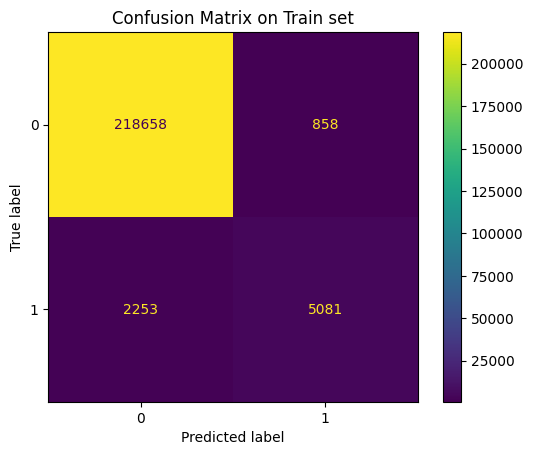

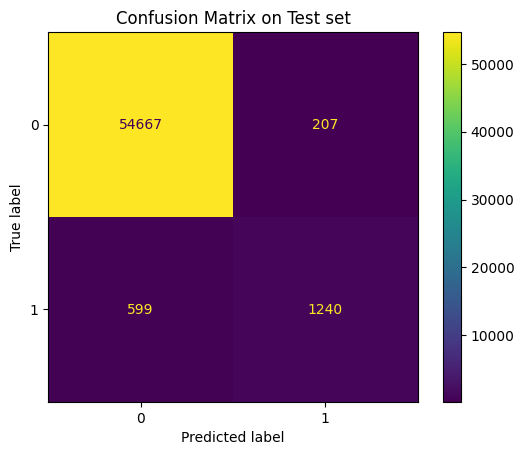

In [16]:
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    logis_regre, X_train, Y_train, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="Confusion Matrix on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    logis_regre, X_test, Y_test, ax=ax
)  # ConfusionMatrixDisplay from sklearn
plt.show()

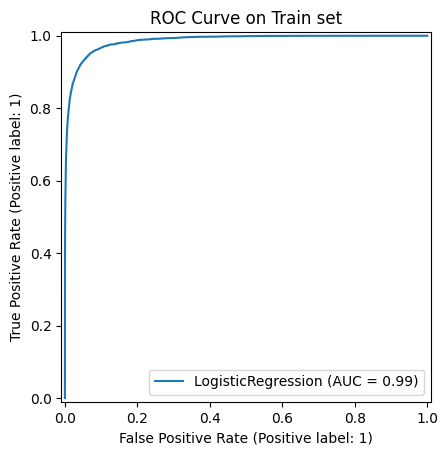

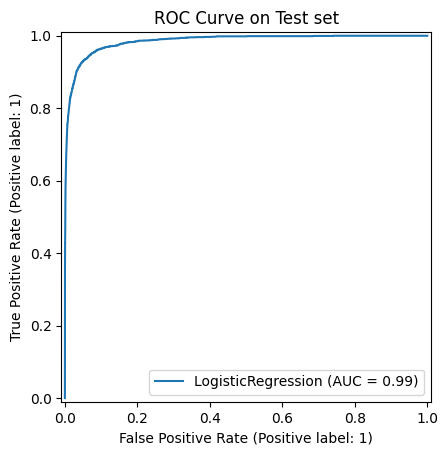

In [17]:
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="ROC Curve on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(
    logis_regre, X_train, Y_train, ax=ax
)  # RocCurveDisplay from sklearn
plt.show()
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="ROC Curve on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(
    logis_regre, X_test, Y_test, ax=ax
)  # RocCurveDisplay from sklearn
plt.show()